# R-Initialization

### R-Package Download

In [423]:
library(ggplot2) # For Plot Visualizations
library(car) # For Variance Inflation Factor function -- vif()
library(corrplot) # For Correlation Visualizations
library(data.table) # For Complex Data Frame Joins
library(leaps) # For Model Selection Criteria
library(MASS)

### Plot Configuration

In [2]:
options(repr.plot.width = 6, repr.plot.height = 6) # Size of plots
alpha = 0.35 # Opacity of points on plots
size = 0.5 # Size of points on plots

### Data Configuration

In [38]:
outlier_coef = 50 # Points above outlier_coef * mean are discarded as outlier events
socioeco_vec = c("Low income","Lower middle income","Upper middle income","High income") # Tiers of Socioeconomic status

# R-Function Definition

In [327]:
# Residuals vs. Fitted Plot
res_v_fit_plot <- function(df.diagnostics,data) {
    ggplot(data=df.diagnostics,aes(x=yhat,y=r)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_hline(yintercept=0) +
        ggtitle("Residuals vs. Fitted") + xlab("Fitted/Predicted Values") + ylab("Residuals") + theme_bw()
}

# Normal Q-Q Plot
qq_plot <- function(df.diagnostics,data) {
    ggplot(data=df.diagnostics,aes(sample=(r-mean(r))/sd(r))) + stat_qq(alpha=alpha,size=size) + 
        geom_abline(slope=1,intercept=0,col="grey") +
        ggtitle("Normal Q-Q") + xlab("Theoretical Quantiles") + ylab("Residual Quantiles") + theme_bw()
}

# Fitted vs. Observed Plot
fit_v_obs_plot <- function(df.diagnostics,data) {
    ggplot(data=df.diagnostics,aes(x=y,y=yhat)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_abline(intercept=0,slope=1) +
        ggtitle("Fitted vs. Observed") + xlab("Observed Values") + ylab("Fitted/Predicted Values") + theme_bw()
}

# Successive Residuals Plot
suc_res_plot <- function(df.diagnostics,data) {
    e_i = head(df.diagnostics$r,dim(data)[1]-1)
    e_j = tail(df.diagnostics$r,dim(data)[1]-1)
    ggplot(data.frame(e_i,e_j),aes(x=e_i,y=e_j)) + geom_point(alpha=alpha,size=size) + 
        geom_vline(xintercept = 0) + geom_hline(yintercept = 0) + 
        ggtitle("Successive Residual Plot") + xlab(expression(hat(epsilon)[i])) + ylab(expression(hat(epsilon)[i+1])) + theme_bw()
}

# Residuals vs. Index Plot
res_v_ind_plot <- function(df.diagnostics,data) {
    ggplot(df.diagnostics,aes(x=1:dim(data)[1],y=r)) + 
        geom_point(alpha=alpha,size=size) + geom_smooth(se=F,col="#CFB87C") +
        ggtitle("Residuals vs. Index") + xlab("Index") + ylab("Residuals") + theme_bw()
}

In [333]:
# All Assumption Plots
assumption_plots <- function(df.diagnostics,data) {
    # Residuals vs. Fitted Plot
    p1 <- ggplot(data=df.diagnostics,aes(x=yhat,y=r)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_hline(yintercept=0) +
        ggtitle("Residuals vs. Fitted") + xlab("Fitted/Predicted Values") + ylab("Residuals") + theme_bw()

    # Normal Q-Q Plot
    p2 <- ggplot(data=df.diagnostics,aes(sample=(r-mean(r))/sd(r))) + stat_qq(alpha=alpha,size=size) + 
        geom_abline(slope=1,intercept=0,col="grey") +
        ggtitle("Normal Q-Q") + xlab("Theoretical Quantiles") + ylab("Residual Quantiles") + theme_bw()

    # Fitted vs. Observed Plot
    p3 <- ggplot(data=df.diagnostics,aes(x=y,y=yhat)) + geom_point(alpha=alpha,size=size) +
        geom_smooth(se=F,col="#CFB87C") + geom_abline(intercept=0,slope=1) +
        ggtitle("Fitted vs. Observed") + xlab("Observed Values") + ylab("Fitted/Predicted Values") + theme_bw()

    # Successive Residuals Plot
    e_i = head(df.diagnostics$r,dim(data)[1]-1)
    e_j = tail(df.diagnostics$r,dim(data)[1]-1)
    p4 <- ggplot(data.frame(e_i,e_j),aes(x=e_i,y=e_j)) + geom_point(alpha=alpha,size=size) + 
        geom_vline(xintercept = 0) + geom_hline(yintercept = 0) + 
        ggtitle("Successive Residual Plot") + xlab(expression(hat(epsilon)[i])) + ylab(expression(hat(epsilon)[i+1])) + theme_bw()

    # Residuals vs. Index Plot
    p5 <- ggplot(df.diagnostics,aes(x=1:dim(data)[1],y=r)) + 
        geom_point(alpha=alpha,size=size) + geom_smooth(se=F,col="#CFB87C") +
        ggtitle("Residuals vs. Index") + xlab("Index") + ylab("Residuals") + theme_bw()
    
    return(list(p1,p2,p3,p4,p5))
}

# Data Initialization

### Data Download

In [3]:
# Downloading Vaccination Data
vaccination = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")))

# Downloading Testing Data
testing = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv")))

# Downloading Hospitalization Data
hospitalization = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv")))

# Downloading Deaths Data
death = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/COVID-19%20Cases%20and%20deaths%20-%20WHO.csv")))
# deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths_per_million.csv")))



In [4]:
head(vaccination)
head(testing)
head(hospitalization)
head(death)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,Date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA


entity,iso_code,date,indicator,value
Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
Algeria,DZA,2020-07-20,Daily ICU occupancy per million,1.425


Country,Year,Daily.new.confirmed.cases.of.COVID.19,Daily.new.confirmed.deaths.due.to.COVID.19,Total.confirmed.cases.of.COVID.19,Total.confirmed.deaths.due.to.COVID.19,Daily.new.confirmed.cases.of.COVID.19.per.million.people,Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,Total.confirmed.cases.of.COVID.19.per.million.people,Total.confirmed.deaths.due.to.COVID.19.per.million.people,...,Weekly.case.growth....,Weekly.death.growth....,Biweekly.cases,Biweekly.deaths,Biweekly.case.growth....,Biweekly.death.growth....,Weekly.cases.per.million.people,Weekly.deaths.per.million.people,Biweekly.cases.per.million.people,Biweekly.deaths.per.million.people
Afghanistan,-18,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-17,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-16,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-15,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-14,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-13,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,0,0,NA,NA


### Data Cleanup

In [5]:
# Restructure vaccination
# 2021-02-22 first term (407), 2020-01-12 — day 1
if (vaccination[1,3] != 407) {
    vaccination$date = as.numeric(vaccination$date)+(407-as.numeric(vaccination[1,3]))
}

In [6]:
# Restructure testing
# 2022-01-29 first term (748), 2020-01-12 -- day 1
testing <- transform(testing,location=sub(" .*", "", Entity)) # Creates location column, using regex on Entity column
colnames(testing)[colnames(testing)=="Date"]="date" # Renames Date column to date
if (testing[1,3] != 748) {
    testing$date = as.numeric(testing$date)+(748-as.numeric(testing[1,3]))
}

In [7]:
# Restructure hospitalization
# 2020-07-17 first term (187), 2020-01-12 -- day 1
if (hospitalization[1,3] != 187) {
    hospitalization$date = as.numeric(hospitalization$date)+(187-as.numeric(hospitalization[1,3]))
}
colnames(hospitalization)[colnames(hospitalization)=="entity"]="location" # Renames Date column to date
hospitalization = hospitalization[hospitalization[,4]=="Daily ICU occupancy",]
colnames(hospitalization)[colnames(hospitalization)=="value"]="icu_daily" # Renames value column to icu_daily

In [8]:
# Restructure deaths
# 2029-12-25 first term (-18), 2020-01-12 -- day 1
colnames(death)[colnames(death) == "Year"] ="date"
colnames(death)[colnames(death) == "Country"] ="location"

In [9]:
head(vaccination)
head(testing)
head(hospitalization)
head(death)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,407,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,408,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,409,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,410,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,411,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,412,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case,location
Afghanistan - tests performed,AFG,748,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,749,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,750,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,751,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,752,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,753,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan


,location,iso_code,date,indicator,icu_daily
1,Algeria,DZA,187,Daily ICU occupancy,62
3,Algeria,DZA,188,Daily ICU occupancy,67
5,Algeria,DZA,190,Daily ICU occupancy,64
7,Algeria,DZA,191,Daily ICU occupancy,56
9,Algeria,DZA,192,Daily ICU occupancy,51
11,Algeria,DZA,193,Daily ICU occupancy,66


location,date,Daily.new.confirmed.cases.of.COVID.19,Daily.new.confirmed.deaths.due.to.COVID.19,Total.confirmed.cases.of.COVID.19,Total.confirmed.deaths.due.to.COVID.19,Daily.new.confirmed.cases.of.COVID.19.per.million.people,Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,Total.confirmed.cases.of.COVID.19.per.million.people,Total.confirmed.deaths.due.to.COVID.19.per.million.people,...,Weekly.case.growth....,Weekly.death.growth....,Biweekly.cases,Biweekly.deaths,Biweekly.case.growth....,Biweekly.death.growth....,Weekly.cases.per.million.people,Weekly.deaths.per.million.people,Biweekly.cases.per.million.people,Biweekly.deaths.per.million.people
Afghanistan,-18,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-17,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-16,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-15,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-14,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-13,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,0,0,NA,NA


# Data Analyses 1 -- Unprocessed Date & All Location

### Method 1:

We are looking purely at the deaths as a function of everything else. This being `Date`, `Location`, `Daily Testing`, `Daily ICU Occipancy`. We are looking at this as a density, to allow for better comparison between countries of different population magnitudes. We merge our data into a set:

In [144]:
data.method1.p1 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date
data.method1.p1 = merge(x=data.method1.p1,y=testing,by=c("location","date")) # Merges testing data on location and date
data.method1.p1 = merge(x=data.method1.p1,y=hospitalization,by=c("location","date")) # Merges hospitalization data on location and date

# colnames(data.method1.p1)
data.method1.p1 <- data.frame(days_since_start=as.numeric(data.method1.p1$date),location=data.method1.p1$location,
                           deaths_daily_per_mil=data.method1.p1$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                           tests_daily_per_thd=data.method1.p1$Daily.change.in.cumulative.total.per.thousand,
                           icu_daily=data.method1.p1$icu_daily,vax_daily_per_mil=data.method1.p1$daily_vaccinations_per_million)

data.method1.p1 = na.omit(data.method1.p1)
data.method1.p1 = subset(data.method1.p1, data.method1.p1$deaths_daily_per_mil < outlier_coef * mean(data.method1.p1$deaths_daily_per_mil) &
                      !data.method1.p1$location%in%socioeco_vec)
# head(data.method1.p1)

In [147]:
lm_method1.p1 = lm(data=data.method1.p1,deaths_daily_per_mil~.)
df.diagnostics.method1.p1 = data.frame(yhat=fitted(lm_method1.p1),r=resid(lm_method1.p1),y=data.method1.p1$deaths_daily_per_mil,
                                    days_since_start=data.method1.p1$days_since_start,location=data.method1.p1$location,
                                    tests_daily_per_thd=data.method1.p1$tests_daily_per_thd,icu_daily=data.method1.p1$icu_daily,
                                    vax_daily_per_mil=data.method1.p1$vax_daily_per_mil)
summary(lm_method1.p1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method1.p1)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.628  -1.328  -0.418   0.825  31.683 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.406e-01  2.193e-01   0.641    0.522    
days_since_start    -2.453e-03  1.695e-04 -14.468  < 2e-16 ***
locationAustralia    2.357e+00  2.004e-01  11.763  < 2e-16 ***
locationAustria      1.791e+00  2.139e-01   8.374  < 2e-16 ***
locationBelgium      2.904e+00  1.929e-01  15.052  < 2e-16 ***
locationBolivia      3.370e+00  2.069e-01  16.287  < 2e-16 ***
locationBulgaria     1.211e+01  5.297e-01  22.856  < 2e-16 ***
locationCanada       1.900e+00  1.878e-01  10.116  < 2e-16 ***
locationChile        2.426e+00  1.774e-01  13.678  < 2e-16 ***
locationCyprus       2.232e-01  2.551e-01   0.875    0.382    
locationCzechia      5.325e+00  1.916e-01  27.791  < 2e-16 ***
locationDenmark      2.555e+00  2.025e-01  12.620  < 2e-16 ***
lo

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


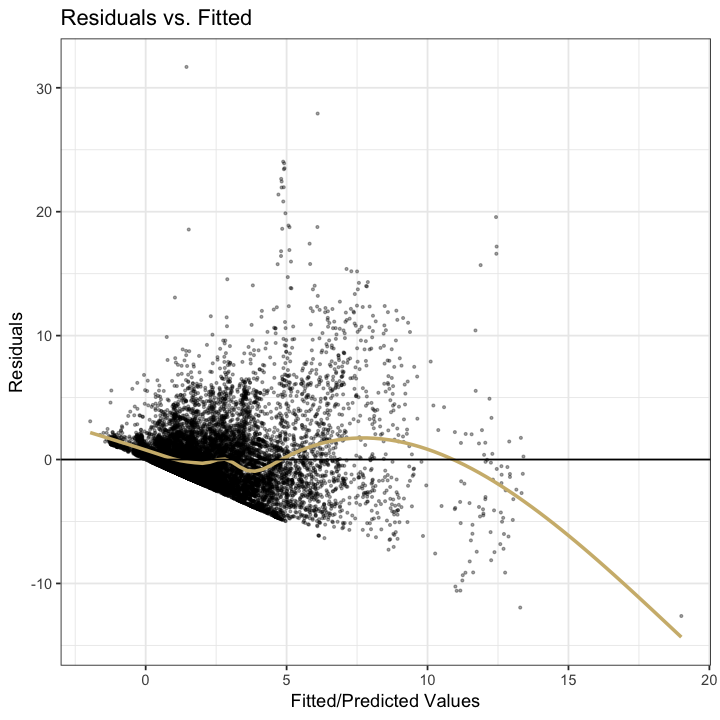

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


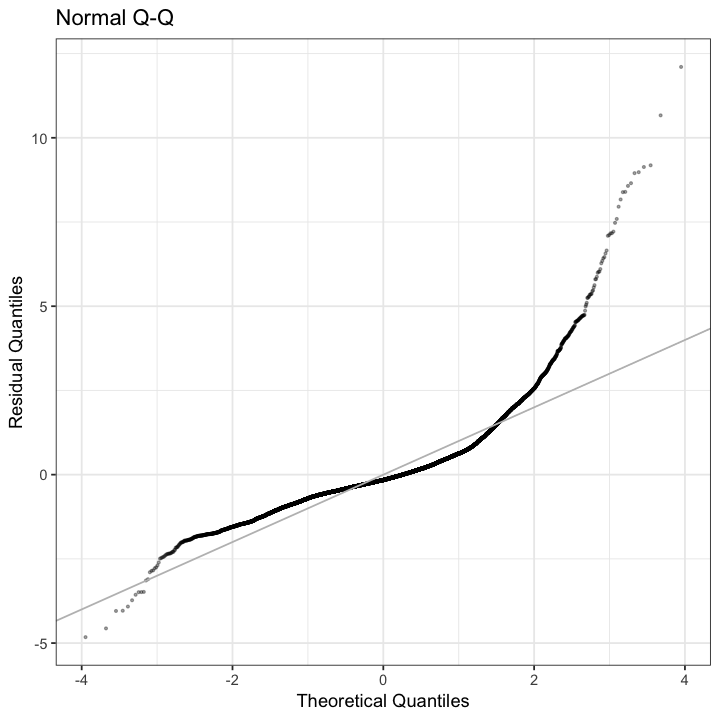

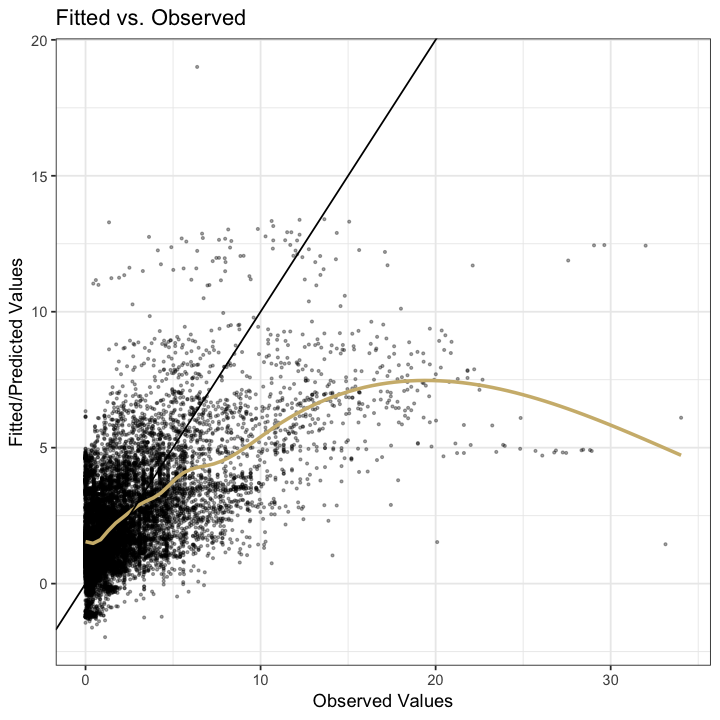

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


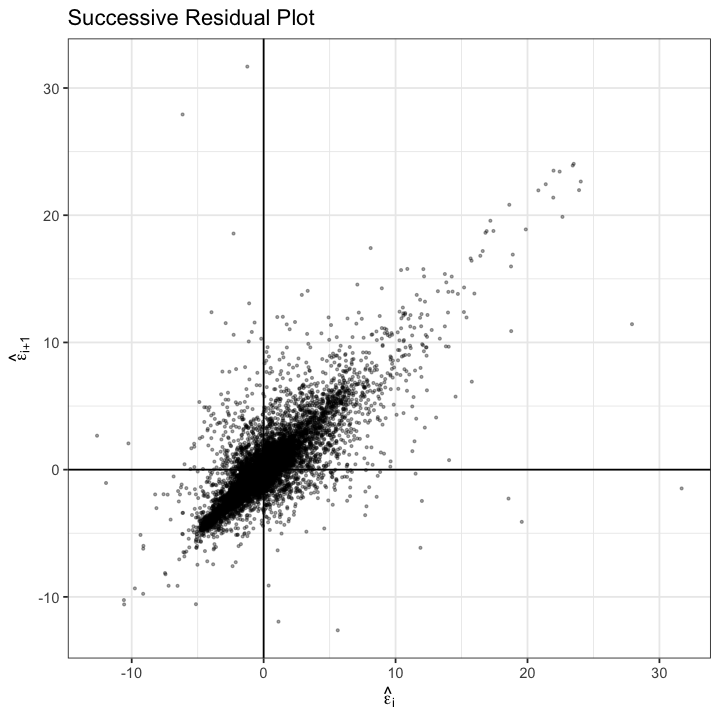

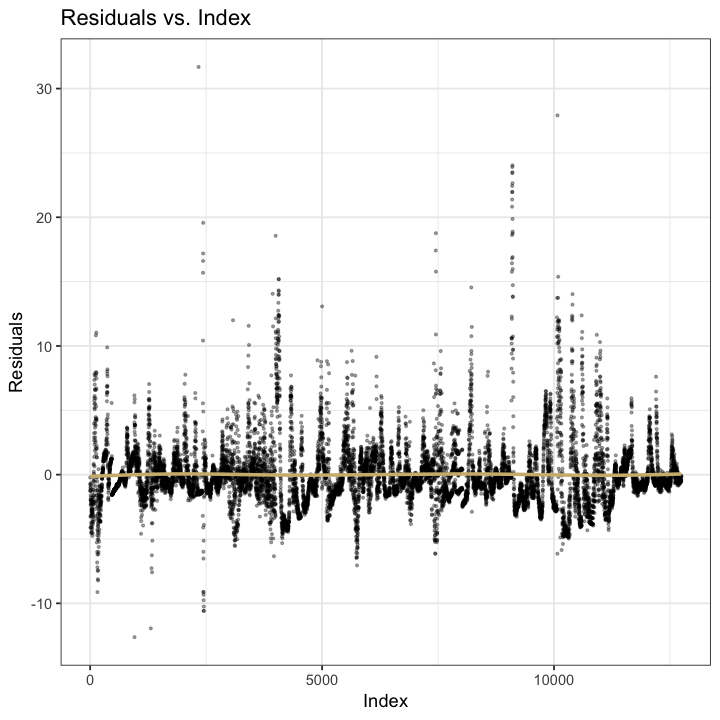

In [341]:
assumption_plots(df.diagnostics.method1.p1,data.method1.p1)[1:5]

In [150]:
vif(lm_method1.p1)

,GVIF,Df,GVIF^(1/(2*Df))
days_since_start,1.227064,1,1.107729
location,7.265978,29,1.034784
tests_daily_per_thd,2.714880,1,1.647689
icu_daily,2.700160,1,1.643216
vax_daily_per_mil,1.165397,1,1.079535


### Method 2:

For this method, we are going to be observing the daily death density vs Date, Socioeconomic Status, and vaccination density for starters

In [151]:
data.method2.p1 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date

# colnames(data.method2)
data.method2.p1 <- data.frame(days_since_start=as.numeric(data.method2.p1$date),economic_status=data.method2.p1$location,
                           deaths_daily_per_mil=data.method2.p1$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                           vax_daily_per_mil=data.method2.p1$daily_vaccinations_per_million)

data.method2.p1 = na.omit(data.method2.p1)
data.method2.p1 = subset(data.method2.p1, data.method2.p1$deaths_daily_per_mil < outlier_coef * mean(data.method2.p1$deaths_daily_per_mil) &
                      data.method2.p1$economic_status%in%socioeco_vec)
head(data.method2.p1)

,days_since_start,economic_status,deaths_daily_per_mil,vax_daily_per_mil
62604,1000,High income,0.531,1118
62605,1001,High income,0.910,1122
62606,1002,High income,1.129,1116
62607,1003,High income,1.091,1131
62608,1004,High income,0.669,1153
62609,1005,High income,2.677,1166


In [152]:
lm_method2.p1 = lm(data=data.method2.p1,deaths_daily_per_mil~.)
df.diagnostics.method2.p1 = data.frame(yhat=fitted(lm_method2.p1),r=resid(lm_method2.p1),y=data.method2.p1$deaths_daily_per_mil,
                                    days_since_start=data.method2.p1$days_since_start,economic_status=data.method2.p1$economic_status,
                                    vax_daily_per_mil=data.method2.p1$vax_daily_per_mil)
summary(lm_method2.p1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method2.p1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0610 -0.3734 -0.0715  0.3047  8.8224 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         3.661e+00  6.496e-02  56.354   <2e-16 ***
days_since_start                   -2.183e-03  6.336e-05 -34.459   <2e-16 ***
economic_statusLow income          -1.875e+00  4.217e-02 -44.469   <2e-16 ***
economic_statusLower middle income -1.601e+00  3.917e-02 -40.870   <2e-16 ***
economic_statusUpper middle income -1.052e+00  3.828e-02 -27.477   <2e-16 ***
vax_daily_per_mil                  -1.104e-05  7.873e-06  -1.402    0.161    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7875 on 3277 degrees of freedom
Multiple R-squared:  0.5666,	Adjusted R-squared:  0.5659 
F-statistic: 856.7 on 5 and 3277 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


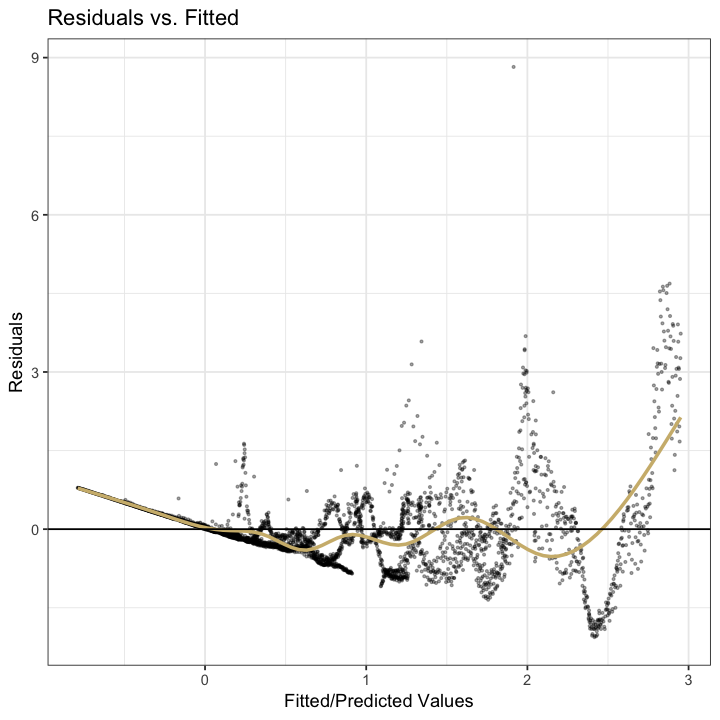

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


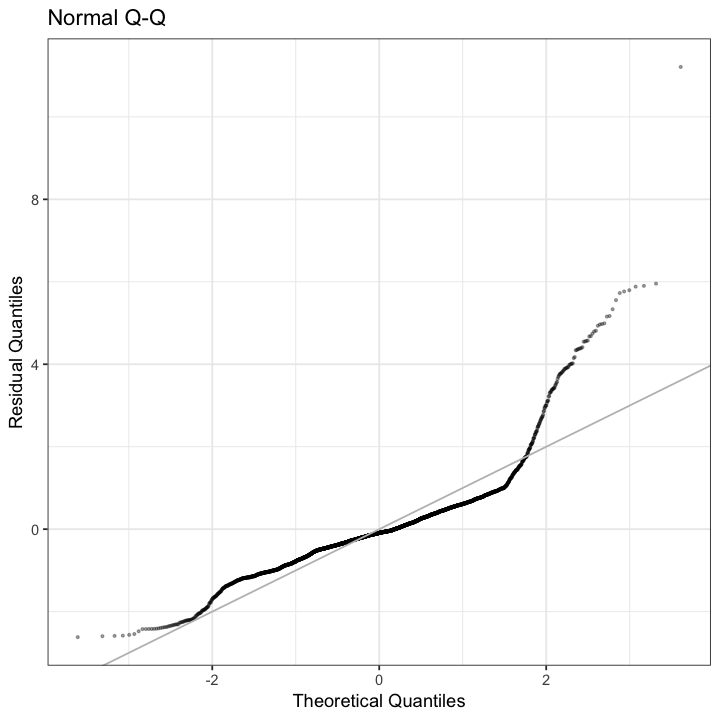

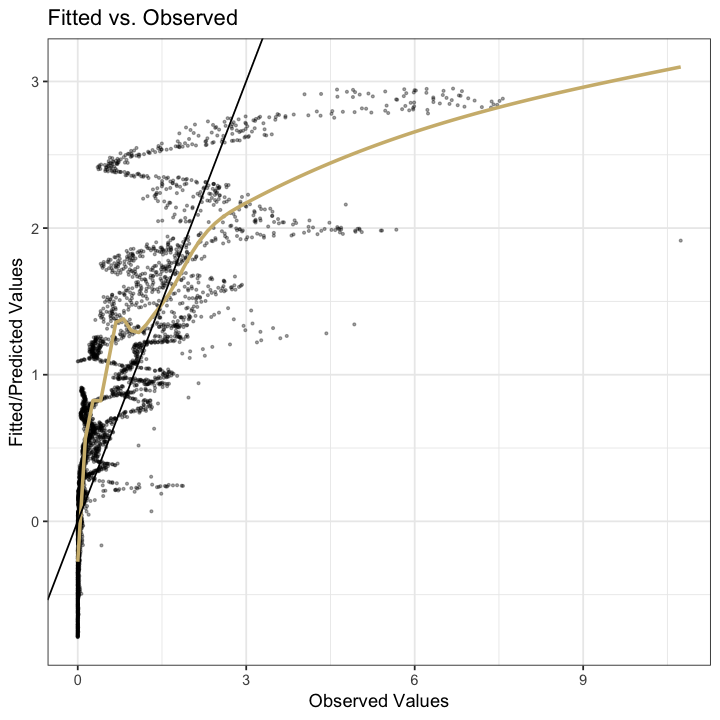

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


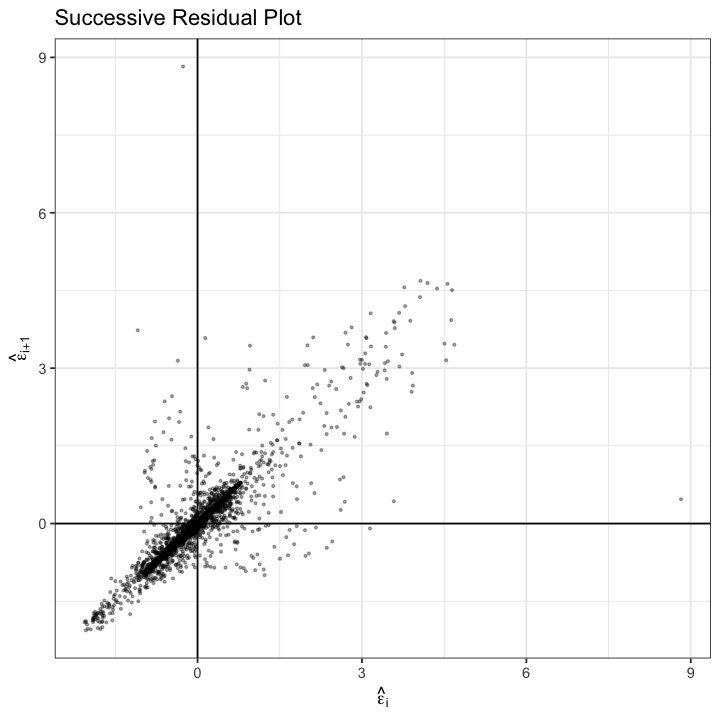

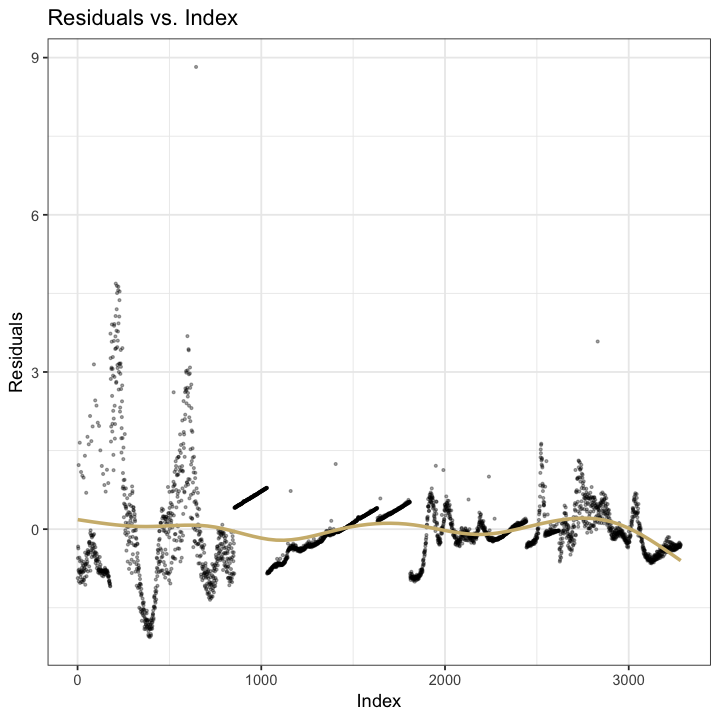

In [342]:
assumption_plots(df.diagnostics.method2.p1,data.method2.p1)

### Method 3
For this method, we are going to be observing the effects that the positive test rate has, as a result of the testing density, vaccinnation density, socioeconomic status, and date.

In [154]:
data.method3.p1 = merge(x=testing,y=vaccination,by=c("location","date")) # Merges testing & vaccination data on location and date

colnames(data.method3.p1)
data.method3.p1 <- data.frame(days_since_start=as.numeric(data.method3.p1$date),location=data.method3.p1$location,
                           positive_testing_rate=data.method3.p1$Short.term.positive.rate,
                           vax_daily_per_mil=data.method3.p1$daily_vaccinations_per_million,
                           tests_daily_per_thd=data.method3.p1$Daily.change.in.cumulative.total.per.thousand)

data.method3.p1 = na.omit(data.method3.p1)
# data.method3.p1 = subset(data.method3.p1,data.method3.p1$economic_status%in%socioeco_vec)
head(data.method3.p1)

[1] "location"                                     
 [2] "date"                                         
 [3] "Entity"                                       
 [4] "ISO.code"                                     
 [5] "Source.URL"                                   
 [6] "Source.label"                                 
 [7] "Notes"                                        
 [8] "Cumulative.total"                             
 [9] "Daily.change.in.cumulative.total"             
[10] "Cumulative.total.per.thousand"                
[11] "Daily.change.in.cumulative.total.per.thousand"
[12] "X7.day.smoothed.daily.change"                 
[13] "X7.day.smoothed.daily.change.per.thousand"    
[14] "Short.term.positive.rate"                     
[15] "Short.term.tests.per.case"                    
[16] "iso_code"                                     
[17] "total_vaccinations"                           
[18] "people_vaccinated"                            
[19] "people_fully_vaccinated"                      
[20] "total_boosters"                               
[21] "daily_vaccinations_raw"                       
[22] "daily_vaccinations"                           
[23] "total_vaccinations_per_hundred"               
[24] "people_vaccinated_per_hundred"                
[25] "people_fully_vaccinated_per_hundred"          
[26] "total_boosters_per_hundred"                   
[27] "daily_vaccinations_per_million"               
[28] "daily_people_vaccinated"                      
[29] "daily_people_vaccinated_per_hundred"

,days_since_start,location,positive_testing_rate,vax_daily_per_mil,tests_daily_per_thd
148,365,Albania,0.1812,23,0.552
149,366,Albania,0.1788,23,1.306
150,367,Albania,0.1825,22,1.158
151,368,Albania,0.1807,23,1.294
152,369,Albania,0.1825,22,1.237
153,370,Albania,0.1913,22,1.061


In [155]:
lm_method3.p1 = lm(data=data.method3.p1,positive_testing_rate~.)
df.diagnostics.method3.p1 = data.frame(yhat=fitted(lm_method3.p1),r=resid(lm_method3.p1),y=data.method3.p1$positive_testing_rate,
                                    days_since_start=data.method3.p1$days_since_start,location=data.method3.p1$location,
                                    vax_daily_per_mil=data.method3.p1$vax_daily_per_mil)
summary(lm_method3.p1)


Call:
lm(formula = positive_testing_rate ~ ., data = data.method3.p1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38419 -0.07044 -0.01787  0.04709  0.89231 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.674e-02  5.931e-03   2.822 0.004779 ** 
days_since_start       2.541e-04  4.271e-06  59.507  < 2e-16 ***
locationAngola        -1.581e-01  4.822e-02  -3.279 0.001042 ** 
locationArgentina      1.277e-02  7.135e-03   1.790 0.073404 .  
locationArmenia       -9.296e-02  7.472e-03 -12.442  < 2e-16 ***
locationAustralia     -1.373e-02  7.268e-03  -1.889 0.058956 .  
locationAustria       -1.519e-01  7.750e-03 -19.598  < 2e-16 ***
locationAzerbaijan    -4.920e-02  1.042e-02  -4.723 2.33e-06 ***
locationBahamas       -8.330e-02  1.275e-02  -6.533 6.56e-11 ***
locationBahrain       -7.445e-02  8.512e-03  -8.746  < 2e-16 ***
locationBangladesh    -4.968e-02  7.406e-03  -6.708 2.00e-11 ***
locationBarbados      -6.484e-

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


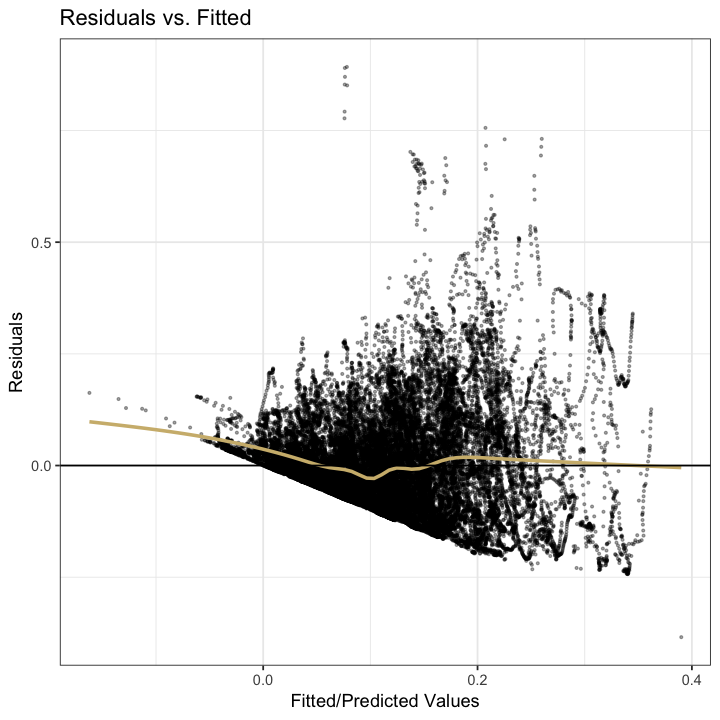

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


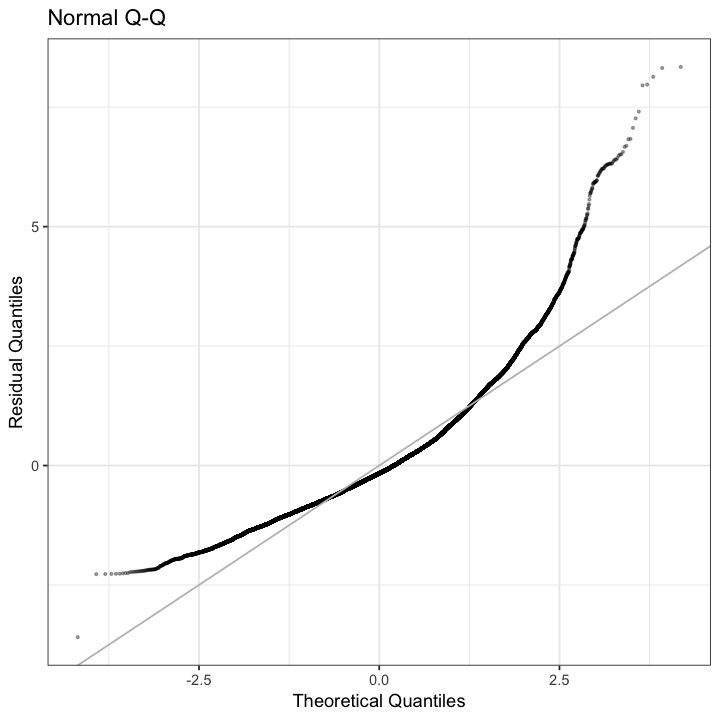

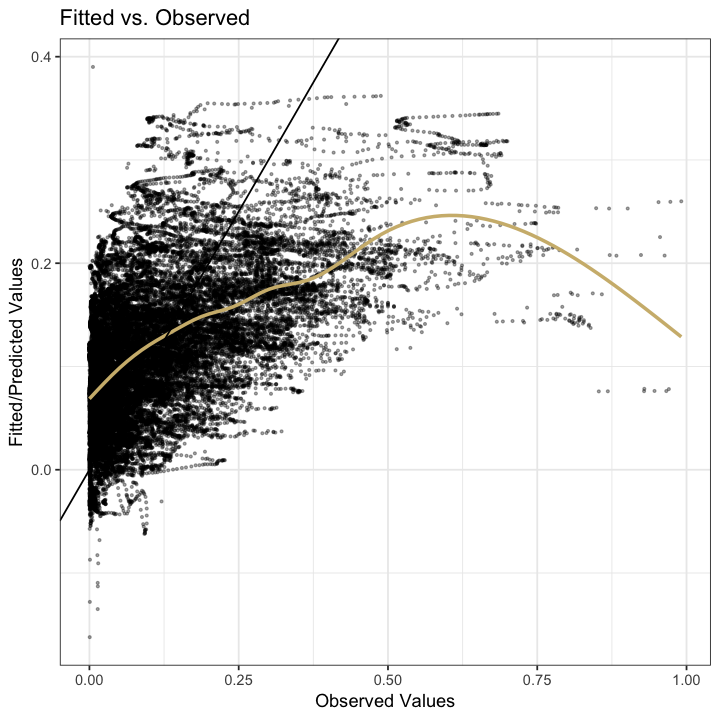

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


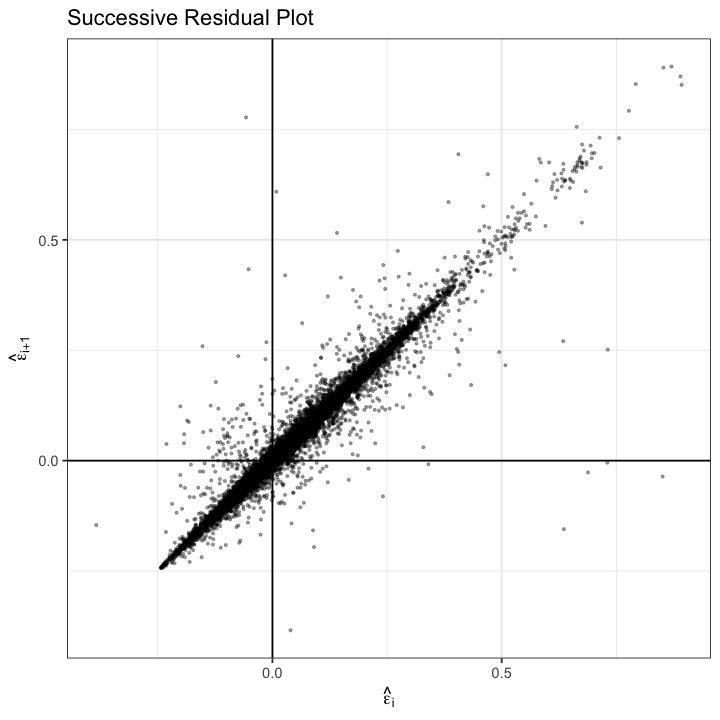

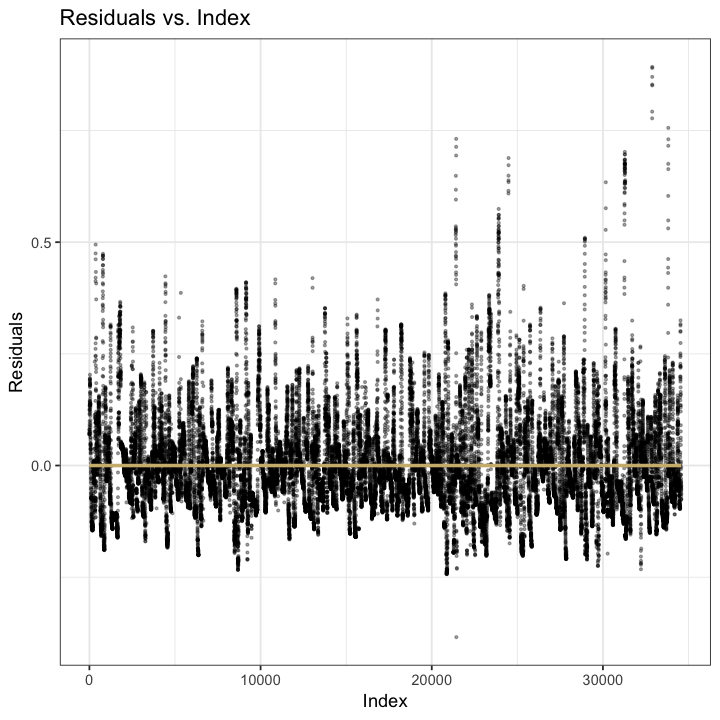

In [343]:
assumption_plots(df.diagnostics.method3.p1,data.method3.p1)

# Data Analysis 2 -- Date Transformation & Selected Location

### Method 1

Now, we are retrying our Part 1 Method 1 analysis, however, we are accounting for some things that were neglected earlier. Mainly, we are accounting for the non-linear relationship between `Date` and deaths, as well as the chaotic combination of locational data that should otherwise not be combined.

Because of the non-linear relationship between `Date` and deaths, we will be examining the `total_deaths_per_mil` rather than `deaths_daily_per_mil`. This is because it allows for a model of the relationship using the sigmoid function:

$$ \sigma(x) = \frac{1}{1+\exp\{-x\}}$$

Or in our case, because we want more controllability over the functional shape and translation:

$$ \sigma(x; A,m,s,o) = \frac{A - o}{1 + \exp \left\{\frac{m - x}{s}\right\}} + o $$

where $A = $ Upper-Asymptote, $m = $ Inflection Point, $s = $ Scale of Curvature, $o = $ Lower-Asymptote. Using this functional form, we will be transforming the `Date` predictor, as well as running a weighted linear regression.

Because of the chaotic nature of combining all different locational data sets together into one, we require looking at a specific location in efforts for understanding the disease spread as a function of a location, and being able to translate that into all other locations. For this, we will select Denmark as a location, because they have the highest data point number for the data we are attempting to analyze.

As a result of our study on the COVID outbreaks, we will be attempting to slice data sets into individual outbreak events per country of study. As a result, we apply graphical analysis to determine how to split data sets into individual outbreaks.

In [367]:
loc = "Denmark"
# loc = "Finland"
# loc = "Malaysia"
# loc = "Switzerland"

data.method1.p2 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date
data.method1.p2 = merge(x=data.method1.p2,y=testing,by=c("location","date")) # Merges testing data on location and date
data.method1.p2 = merge(x=data.method1.p2,y=hospitalization,by=c("location","date")) # Merges hospitalization data on location and date

# colnames(data.method1.p2)
data.method1.p2 <- data.frame(days_since_start=as.numeric(data.method1.p2$date),location=data.method1.p2$location,
                              deaths_daily_per_mil=data.method1.p2$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                              total_deaths_per_mil=data.method1.p2$Total.confirmed.deaths.due.to.COVID.19.per.million.people,
                              tests_daily_per_thd=data.method1.p2$Daily.change.in.cumulative.total.per.thousand,
                              icu_daily=data.method1.p2$icu_daily,vax_daily_per_mil=data.method1.p2$daily_vaccinations_per_million)

data.method1.p2 = na.omit(data.method1.p2)
data.method1.p2 = subset(data.method1.p2,!data.method1.p2$location%in%socioeco_vec&data.method1.p2$location==loc)
# head(data.method1.p2)

,days_since_start,location,deaths_daily_per_mil,total_deaths_per_mil,tests_daily_per_thd,icu_daily,vax_daily_per_mil
4605,342,Denmark,3.57,200.603,19.664,86,0
4606,343,Denmark,5.10,205.703,20.656,87,0
4607,344,Denmark,3.74,209.443,28.747,87,0
4608,345,Denmark,4.08,213.523,27.933,83,0
4609,346,Denmark,7.14,220.664,20.599,91,0
4610,347,Denmark,4.08,224.744,6.639,97,0


Visible here, we have the graph relating the daily death density vs. days since days since 2020-01-12. We can clearly see 2 separate clusters of points, indicating 2 separate COVID outbreak events in Denmark. As a result, we will split these into their own data sets, using day 525 as the splitter for these subsets.

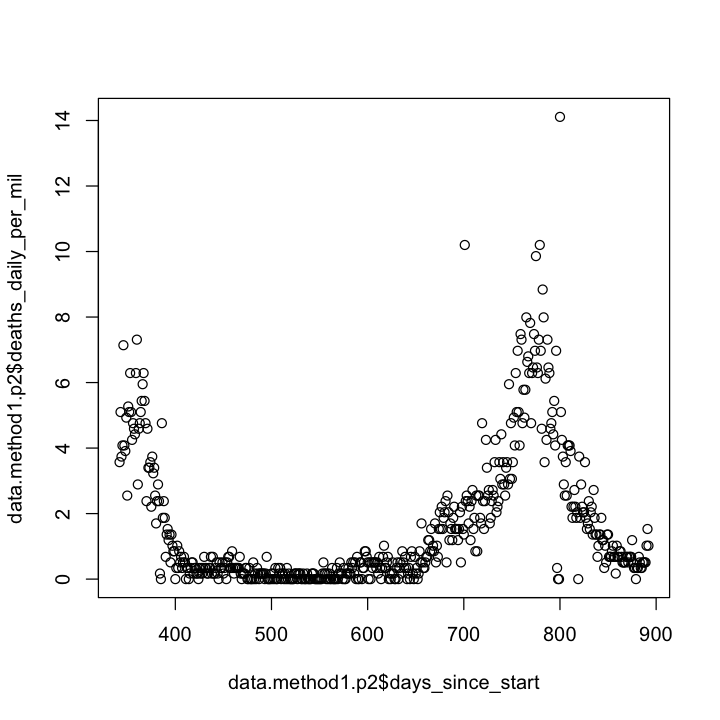

In [422]:
split_point = 525
plot(data.method1.p2$days_since_start,data.method1.p2$deaths_daily_per_mil)
data.method1.p2.s1 = data.method1.p2[data.method1.p2$days_since_start < split_point,]
data.method1.p2.s2 = data.method1.p2[data.method1.p2$days_since_start >= split_point,]

We are now running a non-linear model on each of the subsets, and the superset, in an attempt to find a suitable relationship between the days and the total number of deaths. An integrated normal distribution, which the outbreaks resemble, sigmoid functions, therefore, we are using sigmoid function regression on the total deaths vs. days. We will then use these coefficients gleaned from the sigmoid regressions in an attempt to transform the date variable into a variable linear with total deaths.

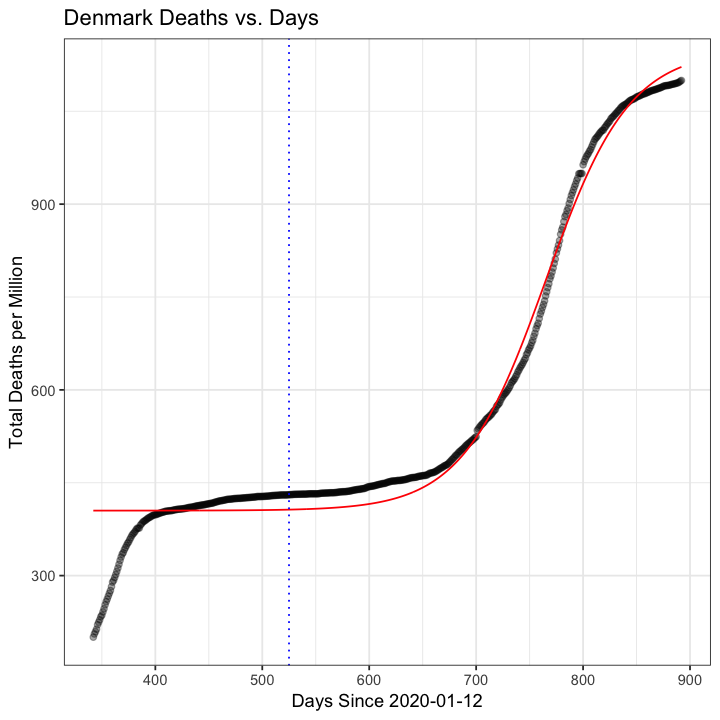

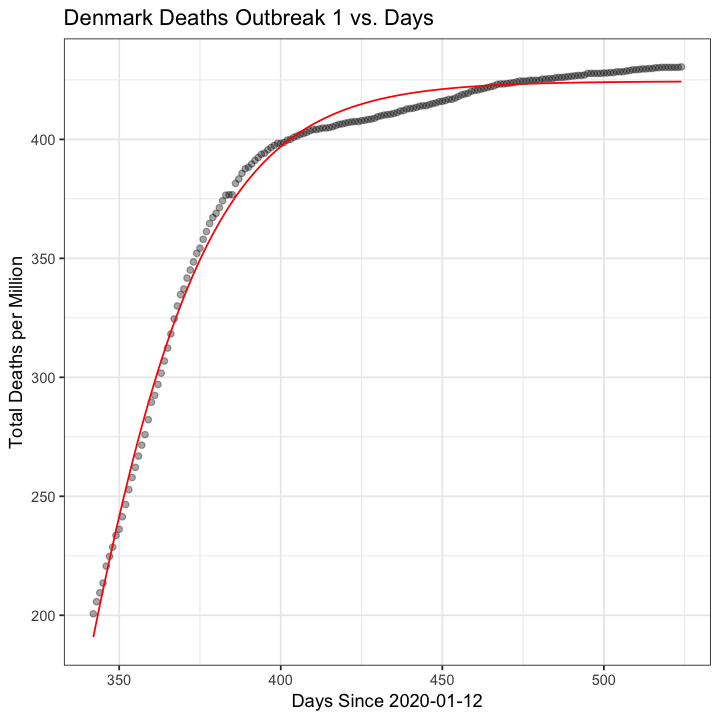

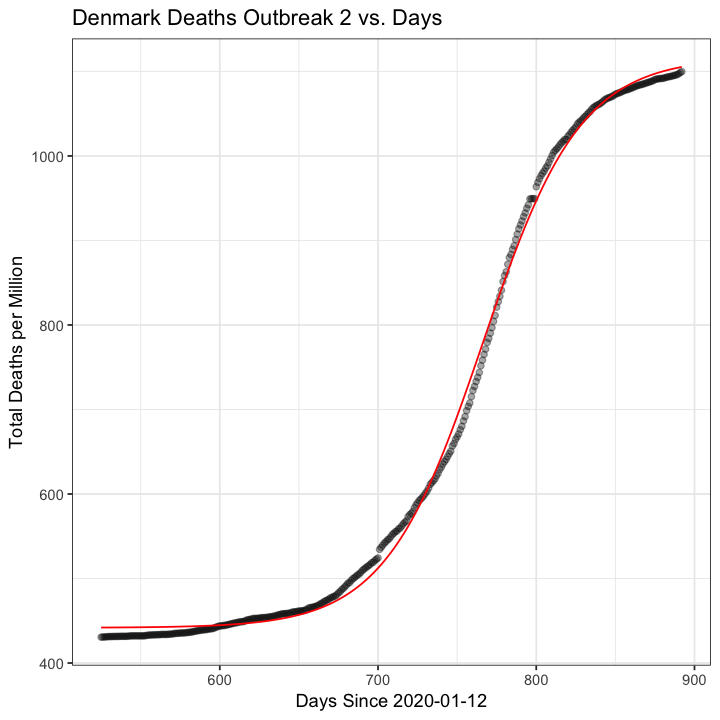

In [419]:
y = data.method1.p2$total_deaths_per_mil
y.s1 = data.method1.p2.s1$total_deaths_per_mil
y.s2 = data.method1.p2.s2$total_deaths_per_mil
x = data.method1.p2$days_since_start
x.s1 = data.method1.p2.s1$days_since_start
x.s2 = data.method1.p2.s2$days_since_start

nlmod.method1.p2 = nls(y~(Asym-Off)/(1+exp((xmid-x)/scal))+Off,
           start=list(Asym=max(y),xmid=(max(x)-min(x))/2,scal=60,Off=min(y)),
           data=data.frame(x,y),
           algorithm='port')
nlmod.method1.p2.s1 = nls(y.s1~(Asym-Off)/(1+exp((xmid-x.s1)/scal))+Off,
           start=list(Asym=max(y.s1),xmid=(max(x.s1)-min(x.s1))/2,scal=40,Off=min(y.s1)),
           data=data.frame(x.s1,y.s1),
           algorithm='port')
nlmod.method1.p2.s2 = nls(y.s2~(Asym-Off)/(1+exp((xmid-x.s2)/scal))+Off,
           start=list(Asym=max(y.s2),xmid=(max(x.s2)-min(x.s2))/2,scal=75,Off=min(y.s2)),
           data=data.frame(x.s2,y.s2),
           algorithm='port')

ggplot(data=data.frame(x,y),aes(x=x,y=y)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_line(data=data.frame(x=x,y=predict(nlmod.method1.p2,data.frame(x))),color="red") +
    geom_vline(xintercept=split_point,color="blue",linetype="dotted") + 
    ggtitle("Denmark Deaths vs. Days") + xlab("Days Since 2020-01-12") + ylab("Total Deaths per Million") + theme_bw()
ggplot(data=data.frame(x.s1,y.s1),aes(x=x.s1,y=y.s1)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_line(data=data.frame(x.s1=x.s1,y.s1=predict(nlmod.method1.p2.s1,data.frame(x.s1))),color="red") +
    ggtitle("Denmark Deaths Outbreak 1 vs. Days") + xlab("Days Since 2020-01-12") + ylab("Total Deaths per Million") + theme_bw()
ggplot(data=data.frame(x.s2,y.s2),aes(x=x.s2,y=y.s2)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_line(data=data.frame(x.s2=x.s2,y.s2=predict(nlmod.method1.p2.s2,data.frame(x.s2))),color="red") +
    ggtitle("Denmark Deaths Outbreak 2 vs. Days") + xlab("Days Since 2020-01-12") + ylab("Total Deaths per Million") + theme_bw()


We now have coefficients for a sigmoid function that transforms the days variable into approximately linear with total deaths. We can now use this transformed variable, along with the other variables in question, to more accurately determine a linear model.

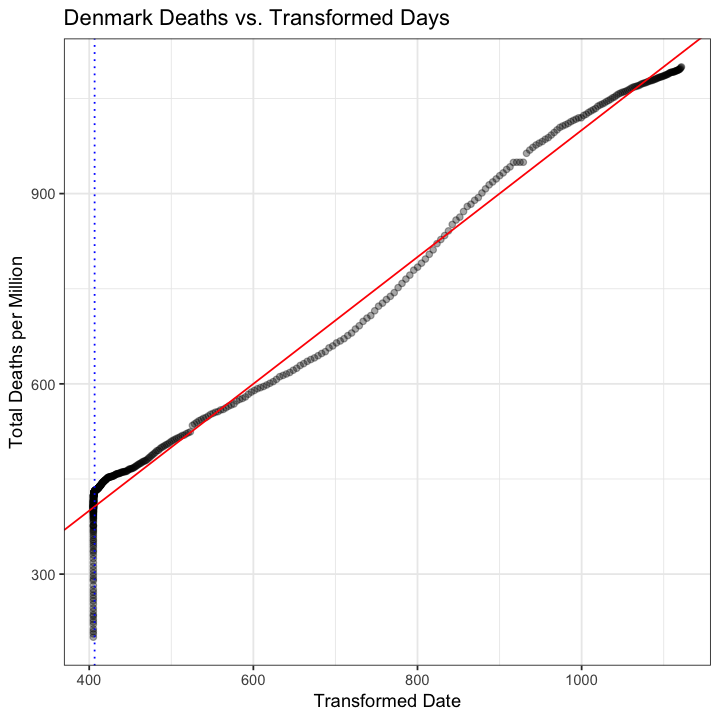

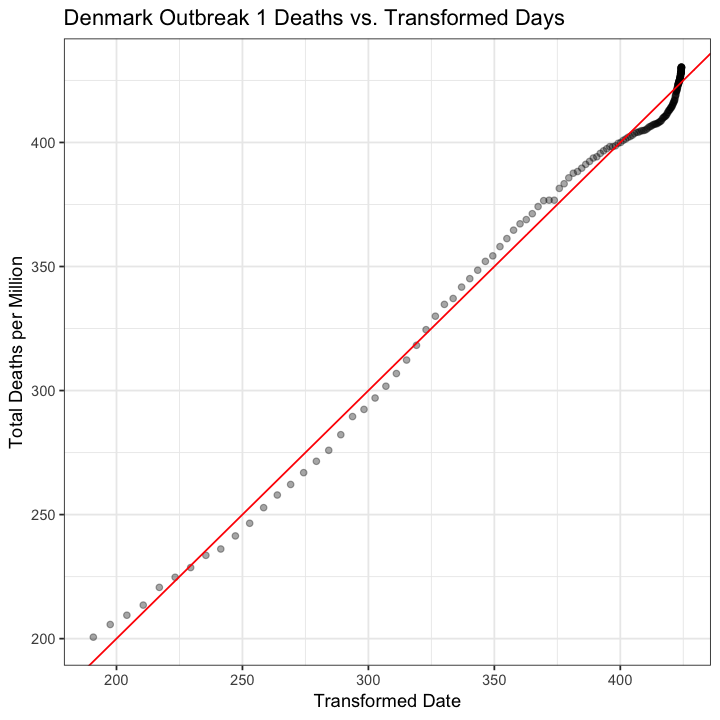

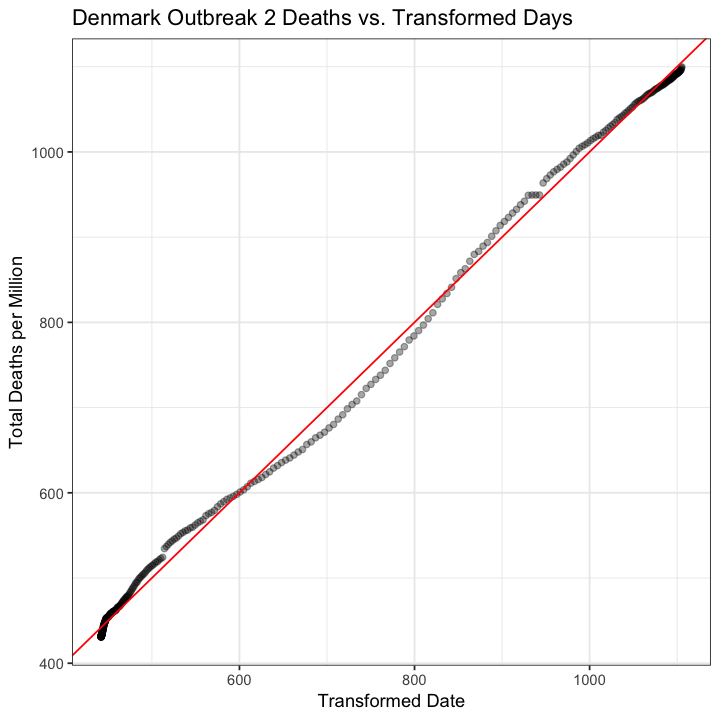

In [414]:
p = coef(nlmod.method1.p2)
p.s1 = coef(nlmod.method1.p2.s1)
p.s2 = coef(nlmod.method1.p2.s2)
data.method1.p2$transformed_date = (p[1]-p[4])/(1+exp((p[2]-data.method1.p2$days_since_start)/p[3]))+p[4]
data.method1.p2.s1$transformed_date = (p.s1[1]-p.s1[4])/(1+exp((p.s1[2]-data.method1.p2.s1$days_since_start)/p.s1[3]))+p.s1[4]
data.method1.p2.s2$transformed_date = (p.s2[1]-p.s2[4])/(1+exp((p.s2[2]-data.method1.p2.s2$days_since_start)/p.s2[3]))+p.s2[4]
y = data.method1.p2$total_deaths_per_mil
y.s1 = data.method1.p2.s1$total_deaths_per_mil
y.s2 = data.method1.p2.s2$total_deaths_per_mil
x = data.method1.p2$transformed_date
x.s1 = data.method1.p2.s1$transformed_date
x.s2 = data.method1.p2.s2$transformed_date

ggplot(data=data.frame(x,y),aes(x=x,y=y)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_abline(slope=1,intercept=0,color="red") +
    geom_vline(xintercept=(p[1]-p[4])/(1+exp((p[2]-split_point)/p[3]))+p[4],color="blue",linetype="dotted") +
    ggtitle("Denmark Deaths vs. Transformed Days") + xlab("Transformed Date") + ylab("Total Deaths per Million") + theme_bw()

ggplot(data=data.frame(x.s1,y.s1),aes(x=x.s1,y=y.s1)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_abline(slope=1,intercept=0,color="red") +
    ggtitle("Denmark Outbreak 1 Deaths vs. Transformed Days") + xlab("Transformed Date") + ylab("Total Deaths per Million") + theme_bw()

ggplot(data=data.frame(x.s2,y.s2),aes(x=x.s2,y=y.s2)) + 
    geom_point(alpha=alpha,size=3*size) + 
    geom_abline(slope=1,intercept=0,color="red") +
    ggtitle("Denmark Outbreak 2 Deaths vs. Transformed Days") + xlab("Transformed Date") + ylab("Total Deaths per Million") + theme_bw()


In [433]:
lm_method1.p2 = lm(data=data.method1.p2,
                     total_deaths_per_mil~tests_daily_per_thd+icu_daily+vax_daily_per_mil+transformed_date)
lm_method1.p2.s1 = lm(data=data.method1.p2.s1,
                     total_deaths_per_mil~tests_daily_per_thd+icu_daily+vax_daily_per_mil+transformed_date)
lm_method1.p2.s2 = lm(data=data.method1.p2.s2,
                     total_deaths_per_mil~tests_daily_per_thd+icu_daily+vax_daily_per_mil+transformed_date)

df.diagnostics.method1.p2 = data.frame(yhat=fitted(lm_method1.p2),r=resid(lm_method1.p2),y=data.method1.p2$total_deaths_per_mil,
                                    days_since_start=data.method1.p2$days_since_start,location=data.method1.p2$location,
                                    tests_daily_per_thd=data.method1.p2$tests_daily_per_thd,icu_daily=data.method1.p2$icu_daily,
                                    vax_daily_per_mil=data.method1.p2$vax_daily_per_mil,transformed_date=data.method1.p2$transformed_date)
df.diagnostics.method1.p2.s1 = data.frame(yhat=fitted(lm_method1.p2.s1),r=resid(lm_method1.p2.s1),y=data.method1.p2.s1$total_deaths_per_mil,
                                    days_since_start=data.method1.p2.s1$days_since_start,location=data.method1.p2.s1$location,
                                    tests_daily_per_thd=data.method1.p2.s1$tests_daily_per_thd,icu_daily=data.method1.p2.s1$icu_daily,
                                    vax_daily_per_mil=data.method1.p2.s1$vax_daily_per_mil,transformed_date=data.method1.p2.s1$transformed_date)
df.diagnostics.method1.p2.s2 = data.frame(yhat=fitted(lm_method1.p2.s2),r=resid(lm_method1.p2.s2),y=data.method1.p2.s2$total_deaths_per_mil,
                                    days_since_start=data.method1.p2.s2$days_since_start,location=data.method1.p2.s2$location,
                                    tests_daily_per_thd=data.method1.p2.s2$tests_daily_per_thd,icu_daily=data.method1.p2.s2$icu_daily,
                                    vax_daily_per_mil=data.method1.p2.s2$vax_daily_per_mil,transformed_date=data.method1.p2.s2$transformed_date)

summary(lm_method1.p2)
summary(lm_method1.p2.s1)
summary(lm_method1.p2.s2)

cor(df.diagnostics.method1.p2.s2$r,df.diagnostics.method1.p2.s2$y)
# corrplot(cor(df.diagnostics.method1.p2.s2[,-8]))
# corr(df.diagnostics.method1.p2.s2)



Call:
lm(formula = total_deaths_per_mil ~ tests_daily_per_thd + icu_daily + 
    vax_daily_per_mil + transformed_date, data = data.method1.p2)

Residuals:
     Min       1Q   Median       3Q      Max 
-157.683   -9.445    4.103   14.917   42.287 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         41.5796087  5.2071485   7.985 8.35e-15 ***
tests_daily_per_thd  0.1845389  0.1231596   1.498    0.135    
icu_daily           -0.9531269  0.0412029 -23.133  < 2e-16 ***
vax_daily_per_mil    0.0015127  0.0003197   4.732 2.84e-06 ***
transformed_date     0.9754262  0.0056328 173.167  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.61 on 546 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.9896 
F-statistic: 1.308e+04 on 4 and 546 DF,  p-value: < 2.2e-16



Call:
lm(formula = total_deaths_per_mil ~ tests_daily_per_thd + icu_daily + 
    vax_daily_per_mil + transformed_date, data = data.method1.p2.s1)

Residuals:
     Min       1Q   Median       3Q      Max 
-134.213   -9.328    3.986   15.186   53.617 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.338e+04  9.818e+03   3.400 0.000832 ***
tests_daily_per_thd  2.612e-01  4.889e-01   0.534 0.593768    
icu_daily           -8.690e-01  1.102e-01  -7.886 3.03e-13 ***
vax_daily_per_mil    1.379e-02  3.083e-03   4.473 1.37e-05 ***
transformed_date    -8.142e+01  2.424e+01  -3.360 0.000955 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.26 on 178 degrees of freedom
Multiple R-squared:  0.675,	Adjusted R-squared:  0.6677 
F-statistic:  92.4 on 4 and 178 DF,  p-value: < 2.2e-16



Call:
lm(formula = total_deaths_per_mil ~ tests_daily_per_thd + icu_daily + 
    vax_daily_per_mil + transformed_date, data = data.method1.p2.s2)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.847  -6.218  -0.685   9.147  28.532 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         57.8212668  2.9484160  19.611  < 2e-16 ***
tests_daily_per_thd -1.4363837  0.1065583 -13.480  < 2e-16 ***
icu_daily            0.1557106  0.0574970   2.708  0.00709 ** 
vax_daily_per_mil    0.0005505  0.0001964   2.803  0.00534 ** 
transformed_date     0.9465242  0.0033675 281.079  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.15 on 363 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9974 
F-statistic: 3.469e+04 on 4 and 363 DF,  p-value: < 2.2e-16


[1] 0.05107949

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


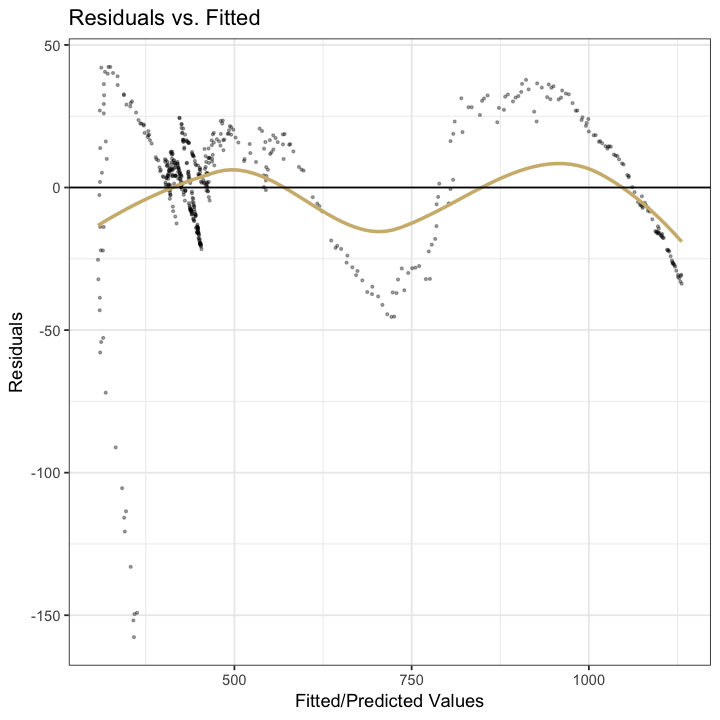

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


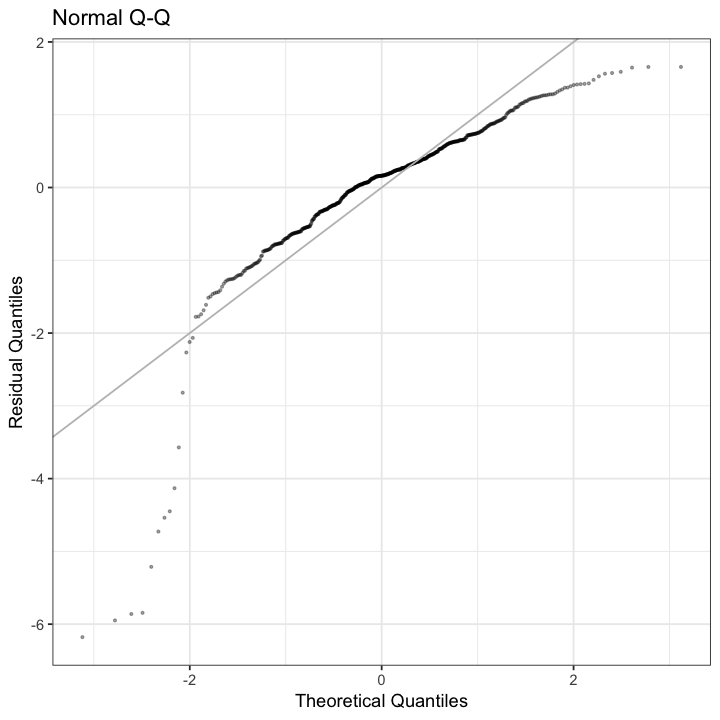

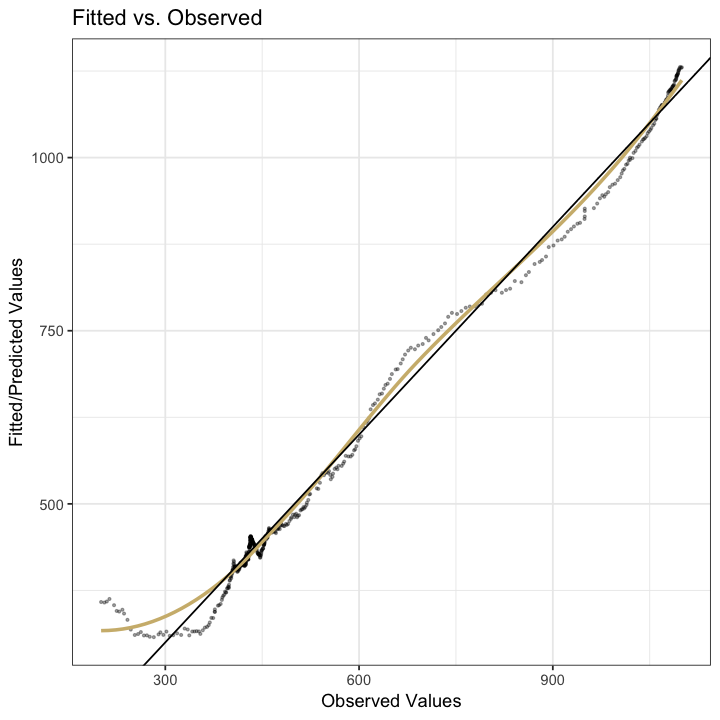

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


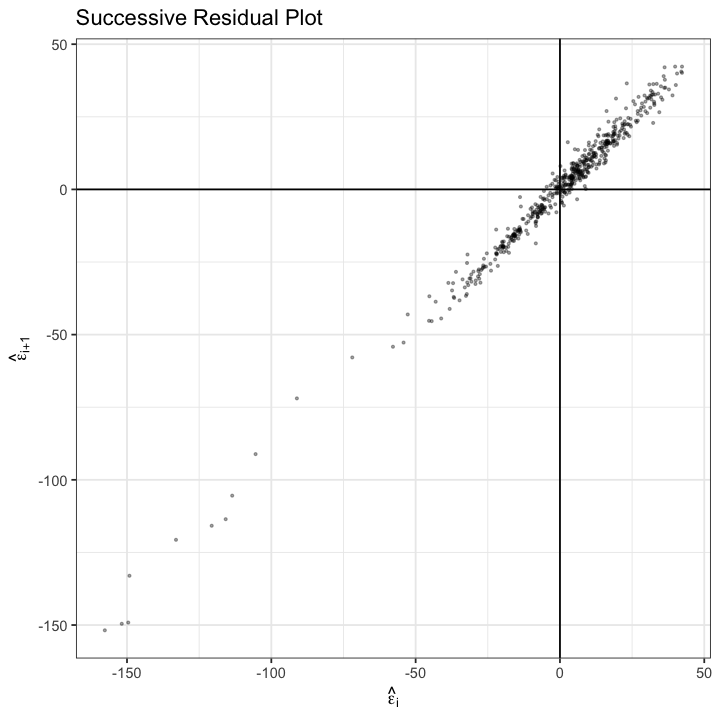

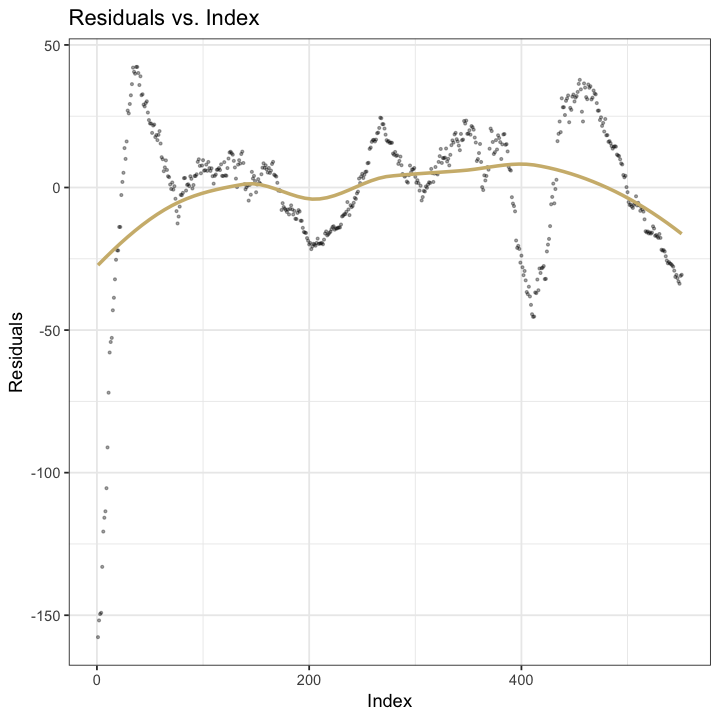

In [416]:
assumption_plots(df.diagnostics.method1.p2,data.method1.p2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


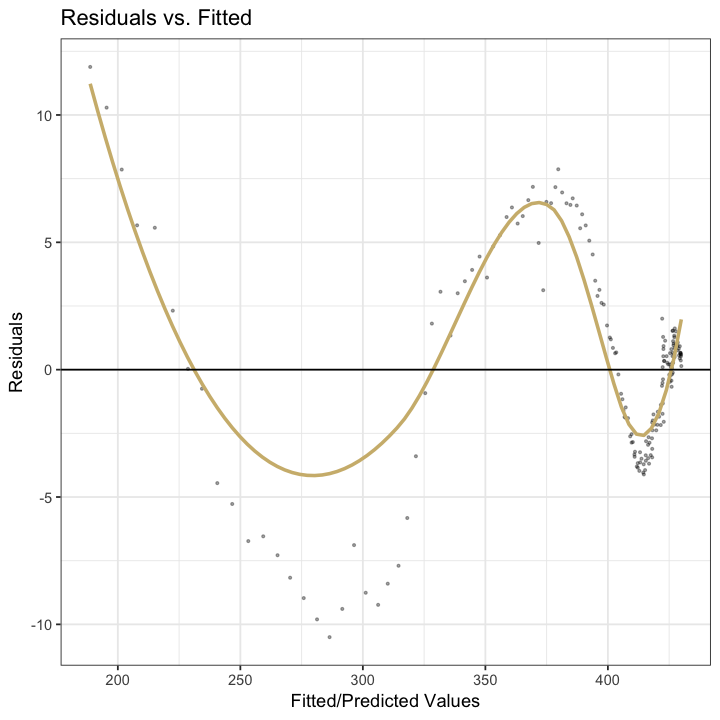

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


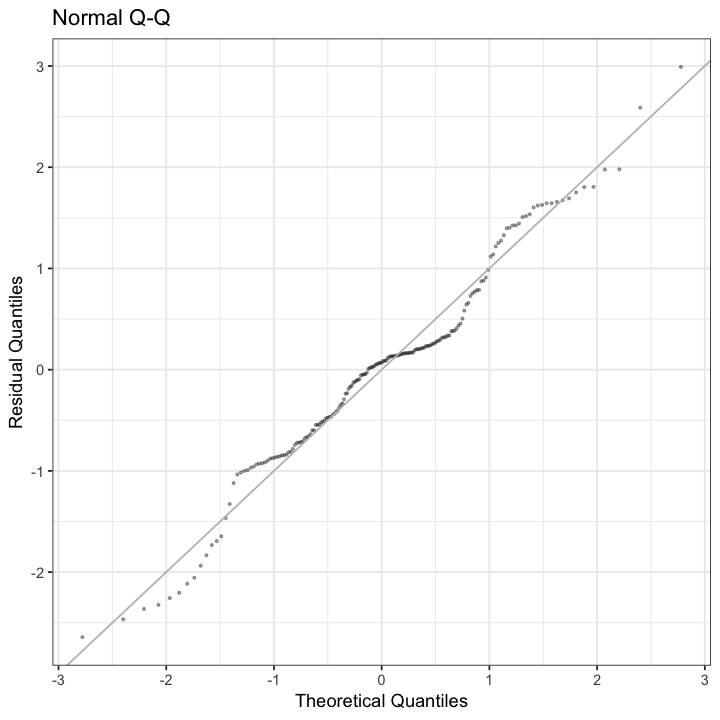

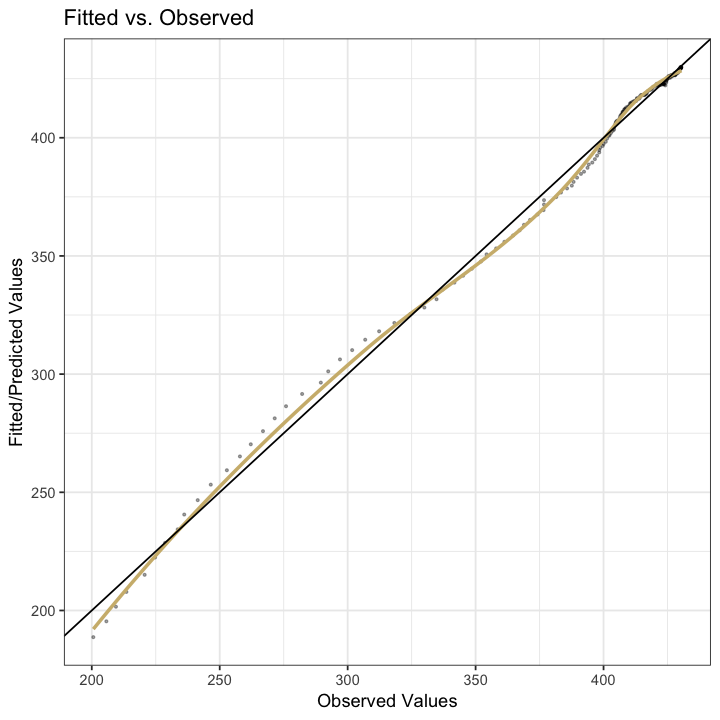

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


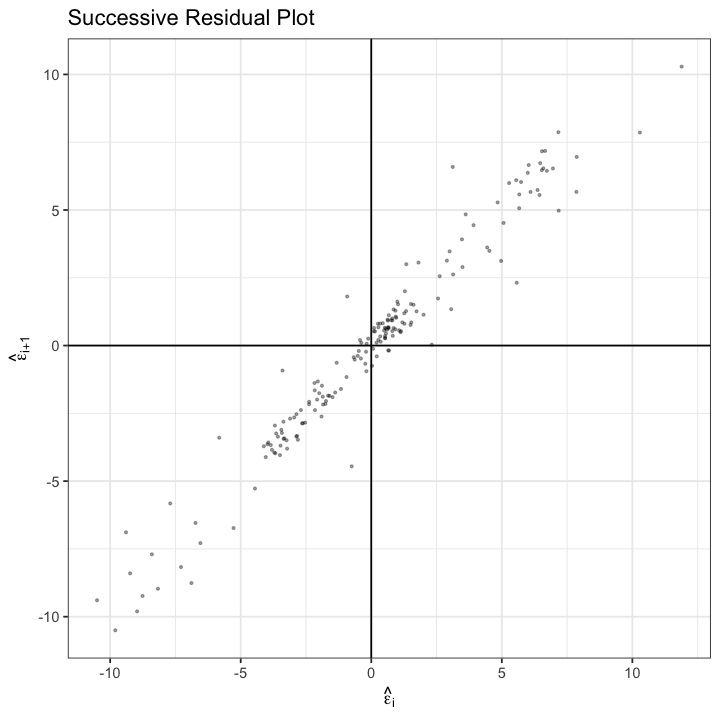

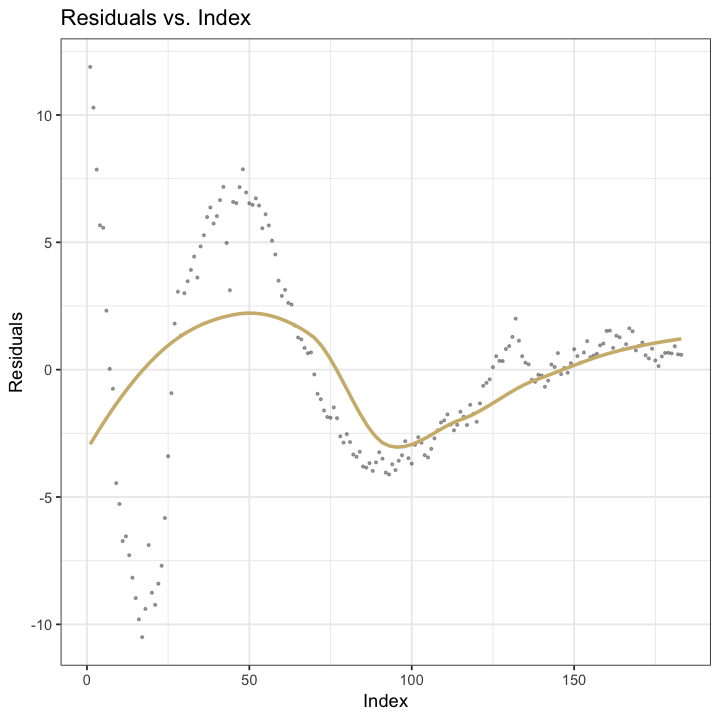

In [417]:
assumption_plots(df.diagnostics.method1.p2.s1,data.method1.p2.s1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


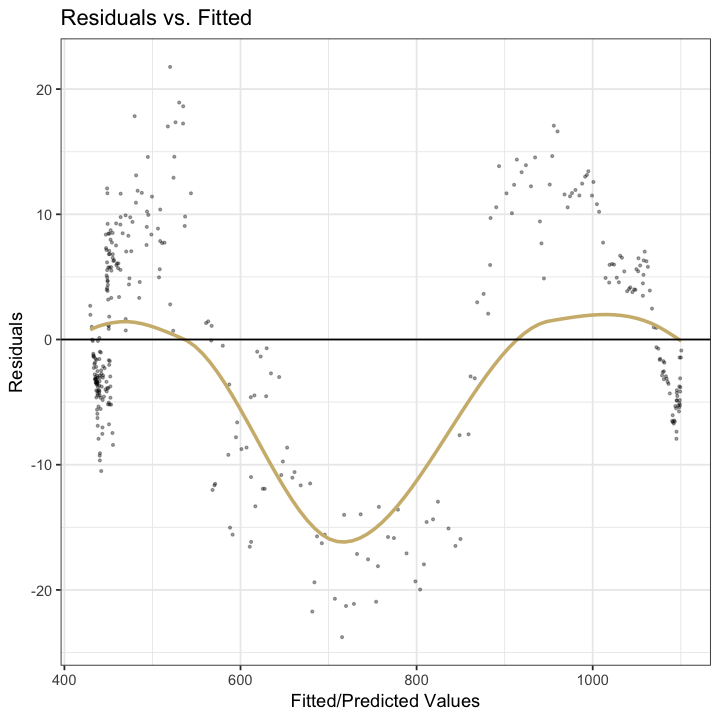

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


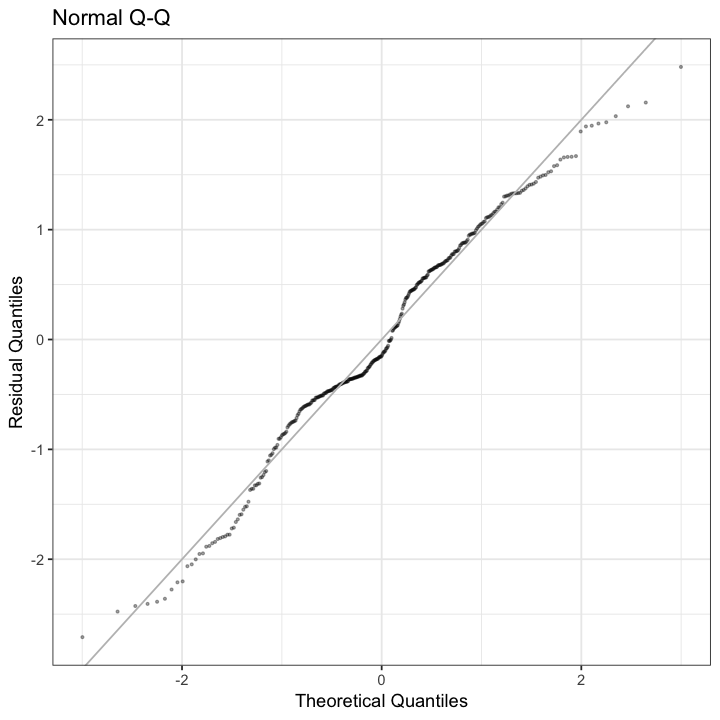

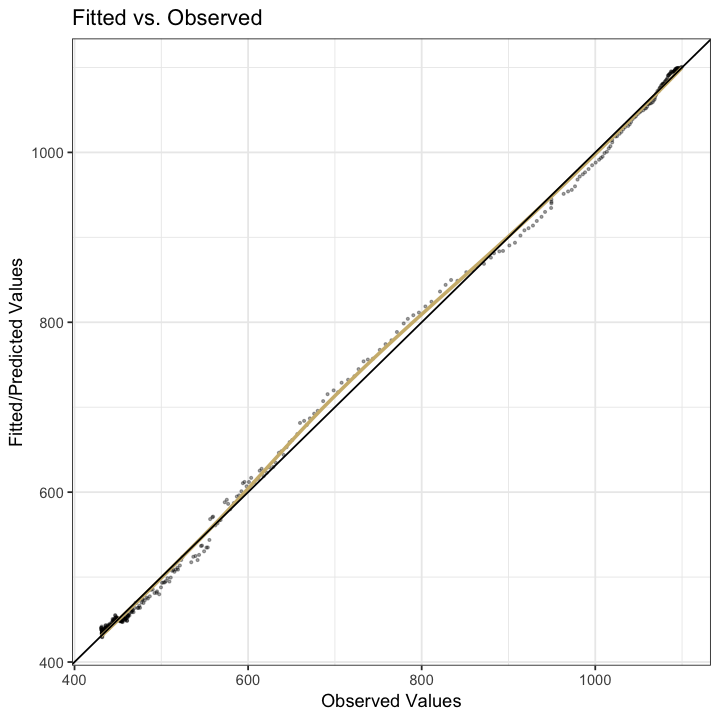

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


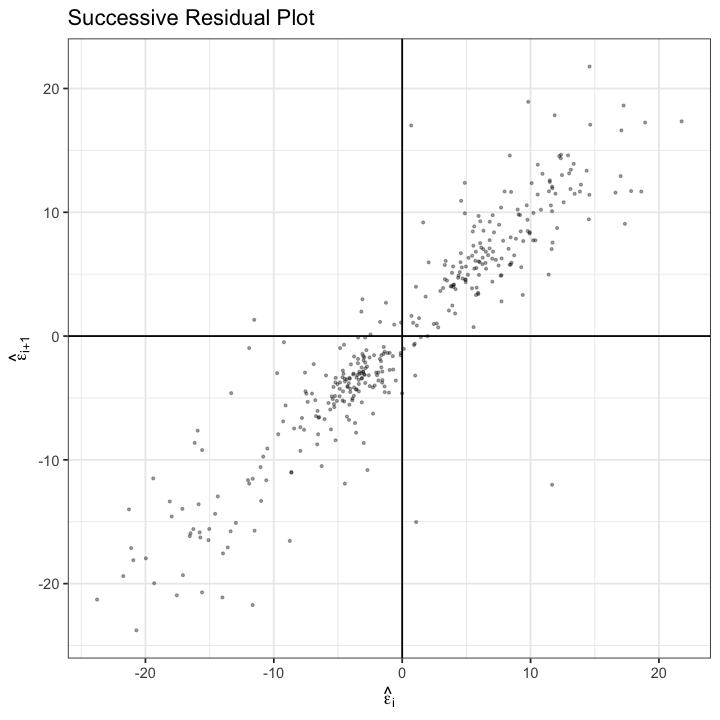

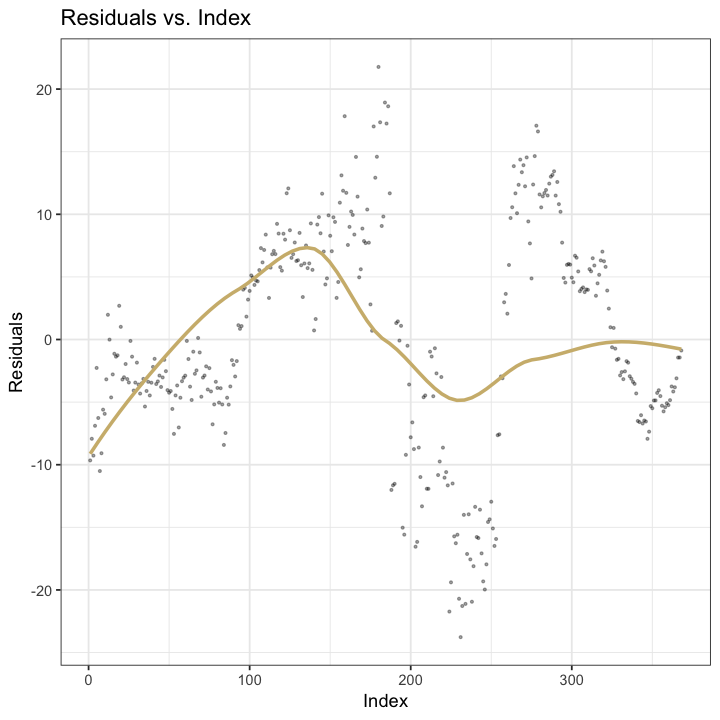

In [418]:
assumption_plots(df.diagnostics.method1.p2.s2,data.method1.p2.s2)

Now lets try for some weighted linear regression techniques

In [424]:
# AIC(lm_method1.p2.s2)

n = dim(data.method1.p2.s2)[1]; 
reg1 = regsubsets(total_deaths_per_mil~tests_daily_per_thd+icu_daily+vax_daily_per_mil+transformed_date,
                  data=data.method1.p2.s2)
rs = summary(reg1)
rs$which

(Intercept),tests_daily_per_thd,icu_daily,vax_daily_per_mil,transformed_date
TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE
